In [12]:
#!/usr/bin/env python3
"""
Cliente multi-thread para fazer requisições HTTP concorrentes.
"""

import threading
import requests
import time
import argparse
from typing import List, Optional
from dataclasses import dataclass


@dataclass
class RequestResult:
    """Resultado de uma requisição HTTP."""
    thread_id: int
    status_code: int
    response_time: float
    success: bool
    error_message: Optional[str] = None


class MultiThreadClient:
    """Cliente que executa requisições HTTP usando múltiplas threads."""
    
    def __init__(self, num_threads: int, url: str = "http://192.168.242.134:7071/primes?count=1000"):
        """
        Inicializa o cliente multi-thread.
        
        Args:
            num_threads: Número de threads a serem criadas
            url: URL para fazer as requisições (default: http://192.168.242.134:7071/primes?count=1000)
        """
        self.num_threads = num_threads
        self.url = url
        self.results: List[RequestResult] = []
        self.results_lock = threading.Lock()
        
    def make_request(self, thread_id: int) -> None:
        """
        Executa uma requisição HTTP em uma thread específica.
        
        Args:
            thread_id: ID da thread atual
        """
        start_time = time.time()
        
        try:
            print(f"Thread {thread_id}: Iniciando requisição para {self.url}")
            response = requests.get(self.url, timeout=30)
            end_time = time.time()
            response_time = end_time - start_time
            
            result = RequestResult(
                thread_id=thread_id,
                status_code=response.status_code,
                response_time=response_time,
                success=response.status_code == 200
            )
            
            print(f"Thread {thread_id}: Concluída - Status: {response.status_code}, Tempo: {response_time:.2f}s")
            
        except requests.exceptions.RequestException as e:
            end_time = time.time()
            response_time = end_time - start_time
            
            result = RequestResult(
                thread_id=thread_id,
                status_code=-1,
                response_time=response_time,
                success=False,
                error_message=str(e)
            )
            
            print(f"Thread {thread_id}: Erro - {e}")
        
        # Thread-safe append dos resultados
        with self.results_lock:
            self.results.append(result)
    
    def run(self) -> List[RequestResult]:
        """
        Executa todas as threads e aguarda a conclusão.
        
        Returns:
            Lista com os resultados de todas as requisições
        """
        print(f"Iniciando {self.num_threads} threads para requisições em {self.url}")
        print("-" * 60)
        
        threads = []
        start_time = time.time()
        
        # Cria e inicia todas as threads
        for i in range(self.num_threads):
            thread = threading.Thread(target=self.make_request, args=(i + 1,))
            threads.append(thread)
            thread.start()
        
        # Aguarda todas as threads terminarem
        for thread in threads:
            thread.join()
        
        end_time = time.time()
        total_time = end_time - start_time
        
        self._print_summary(total_time)
        return self.results
    
    def _print_summary(self, total_time: float) -> None:
        """Imprime um resumo dos resultados."""
        print("-" * 60)
        print("RESUMO DOS RESULTADOS:")
        print(f"Total de threads: {self.num_threads}")
        print(f"Tempo total de execução: {total_time:.2f}s")
        
        successful_requests = sum(1 for r in self.results if r.success)
        failed_requests = len(self.results) - successful_requests
        
        print(f"Requisições bem-sucedidas: {successful_requests}")
        print(f"Requisições falharam: {failed_requests}")
        
        if self.results:
            avg_response_time = sum(r.response_time for r in self.results) / len(self.results)
            min_response_time = min(r.response_time for r in self.results)
            max_response_time = max(r.response_time for r in self.results)
            
            print(f"Tempo médio de resposta: {avg_response_time:.2f}s")
            print(f"Tempo mínimo de resposta: {min_response_time:.2f}s")
            print(f"Tempo máximo de resposta: {max_response_time:.2f}s")
        
        print("-" * 60)


def main():
    """Função principal do programa."""
    parser = argparse.ArgumentParser(description="Cliente multi-thread para requisições HTTP")
    parser.add_argument(
        "num_threads", 
        type=int, 
        help="Número de threads a serem criadas"
    )
    parser.add_argument(
        "--url", 
        default="http://192.168.242.134:7071/primes?count=1000",
        help="URL para fazer as requisições (default: http://192.168.242.134:7071/primes?count=1000)"
    )
    
    args = parser.parse_args()
    
    if args.num_threads <= 0:
        print("Erro: O número de threads deve ser maior que 0")
        return
    
    # Cria e executa o cliente
    client = MultiThreadClient(args.num_threads, args.url)
    results = client.run()
    
    # Opcionalmente, você pode processar os resultados aqui
    # Por exemplo, salvar em um arquivo, fazer análises adicionais, etc.


if __name__ == "__main__":
    num_threads = 30

    url = "http://localhost:30071/primes?count=10000"
    client = MultiThreadClient(num_threads, url)
    results = client.run()
    #main()

Iniciando 30 threads para requisições em http://localhost:30071/primes?count=10000
------------------------------------------------------------
Thread 1: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 2: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 3: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 4: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 5: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 6: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 7: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 8: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 1: Concluída - Status: 200, Tempo: 0.42s
Thread 2: Concluída - Status: 200, Tempo: 0.36s
Thread 4: Concluída - Status: 200, Tempo: 0.21s
Thread 9: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 10:

In [4]:
# ================================================================
# MONITOR DE MEMÓRIA PROMETHEUS - JUPYTER NOTEBOOK
# Versão otimizada para uso interativo no Jupyter
# ================================================================

import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
from typing import List, Dict, Tuple, Optional
import json
import warnings
warnings.filterwarnings('ignore')

# Configurações para Jupyter
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

class JupyterPrometheusMonitor:
    """Monitor de memória Prometheus otimizado para Jupyter"""
    
    def __init__(self, prometheus_url: str = "http://localhost:9090", 
                 container_name: str = "prime-server",
                 namespace: str = None):
        self.prometheus_url = prometheus_url.rstrip('/')
        self.container_name = container_name
        self.namespace = namespace
        self.last_data = []
        
        print(f"🚀 Monitor inicializado:")
        print(f"   Prometheus: {self.prometheus_url}")
        print(f"   Container: {self.container_name}")
        if self.namespace:
            print(f"   Namespace: {self.namespace}")
    
    def _build_query(self) -> str:
        """Constrói a query do Prometheus"""
        base_query = f'container_memory_working_set_bytes{{container="{self.container_name}"'
        
        if self.namespace:
            base_query += f', namespace="{self.namespace}"'
        
        base_query += '}'
        return base_query
    
    def test_connection(self) -> bool:
        """Testa conexão com Prometheus"""
        print("🔍 Testando conexão com Prometheus...")
        
        try:
            query = self._build_query()
            print(query)
            response = requests.get(
                f"{self.prometheus_url}/api/v1/query",
                params={"query": query},
                timeout=10
            )
            response.raise_for_status()
            
            data = response.json()
            
            if data['status'] != 'success':
                print(f"❌ Erro na query: {data}")
                return False
                
            results = data['data']['result']
            if not results:
                print(f"❌ Container '{self.container_name}' não encontrado")
                return False
            
            memory_bytes = float(results[0]['value'][1])
            memory_mb = memory_bytes / (1024 * 1024)
            
            print(f"✅ Conexão OK!")
            print(f"   Uso atual de memória: {memory_mb:.2f} MB")
            print(f"   Timestamp: {datetime.fromtimestamp(float(results[0]['value'][0]))}")
            
            return True
            
        except requests.exceptions.RequestException as e:
            print(f"❌ Erro de conexão: {e}")
            return False
        except Exception as e:
            print(f"❌ Erro: {e}")
            return False
    
    def get_memory_data(self, duration_minutes: int = 30, 
                       step_seconds: int = 5) -> pd.DataFrame:
        """Coleta dados históricos de memória"""
        print(f"📊 Coletando dados dos últimos {duration_minutes} minutos...")
        
        query = self._build_query()
        end_time = int(time.time())
        start_time = end_time - (duration_minutes * 60)
        
        try:
            response = requests.get(
                f"{self.prometheus_url}/api/v1/query_range",
                params={
                    "query": query,
                    "start": start_time,
                    "end": end_time,
                    "step": f"{step_seconds}s"
                },
                timeout=30
            )
            response.raise_for_status()
            
            data = response.json()
            
            if data['status'] != 'success':
                print(f"❌ Erro na query: {data}")
                return pd.DataFrame()
            
            results = data['data']['result']
            if not results:
                print(f"❌ Nenhum dado encontrado")
                return pd.DataFrame()
            
            # Processa os dados
            timestamps = []
            memory_mb = []
            
            for timestamp, value in results[0]['values']:
                timestamps.append(datetime.fromtimestamp(timestamp))
                memory_mb.append(float(value) / (1024 * 1024))
            
            df = pd.DataFrame({
                'timestamp': timestamps,
                'memory_mb': memory_mb
            })
            
            self.last_data = df.copy()  # Guarda para uso posterior
            
            print(f"✅ Coletados {len(df)} pontos de dados")
            return df
            
        except Exception as e:
            print(f"❌ Erro ao coletar dados: {e}")
            return pd.DataFrame()
    
    def plot_memory_usage(self, df: pd.DataFrame = None, 
                         title_suffix: str = "") -> None:
        """Plota gráfico de uso de memória"""
        if df is None:
            df = self.last_data
        
        if df.empty:
            print("❌ Nenhum dado para plotar")
            return
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
        
        # Gráfico principal - linha do tempo
        ax1.plot(df['timestamp'], df['memory_mb'], 'b-', linewidth=1.5, alpha=0.8)
        ax1.fill_between(df['timestamp'], df['memory_mb'], alpha=0.3, color='lightblue')
        
        ax1.set_title(f'Uso de Memória - {self.container_name}{title_suffix}', 
                     fontsize=16, fontweight='bold')
        ax1.set_ylabel('Memória (MB)', fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        # Formatação do eixo X
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        total_minutes = (df['timestamp'].max() - df['timestamp'].min()).total_seconds() / 60
        interval = max(1, int(total_minutes // 10))
        ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=interval))
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
        
        # Estatísticas
        stats = {
            'Atual': df['memory_mb'].iloc[-1],
            'Máximo': df['memory_mb'].max(),
            'Mínimo': df['memory_mb'].min(),
            'Média': df['memory_mb'].mean(),
            'Desvio': df['memory_mb'].std()
        }
        
        stats_text = '\n'.join([f'{k}: {v:.2f} MB' for k, v in stats.items()])
        ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, 
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9))
        
        # Histograma
        ax2.hist(df['memory_mb'], bins=30, alpha=0.7, color='skyblue', 
                edgecolor='black', density=True)
        ax2.axvline(df['memory_mb'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Média: {df["memory_mb"].mean():.2f} MB')
        ax2.axvline(df['memory_mb'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Mediana: {df["memory_mb"].median():.2f} MB')
        
        ax2.set_xlabel('Memória (MB)', fontsize=12)
        ax2.set_ylabel('Densidade', fontsize=12)
        ax2.set_title('Distribuição do Uso de Memória', fontsize=14)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Imprime estatísticas detalhadas
        print("\n📈 ESTATÍSTICAS DETALHADAS:")
        print("-" * 40)
        for key, value in stats.items():
            print(f"{key:12}: {value:8.2f} MB")
        
        # Análise de variação
        variation = ((stats['Máximo'] - stats['Mínimo']) / stats['Média']) * 100
        print(f"{'Variação':12}: {variation:8.2f} %")
        
        duration = df['timestamp'].max() - df['timestamp'].min()
        print(f"{'Duração':12}: {duration}")
        print(f"{'Pontos':12}: {len(df):8d}")
    
    def plot_memory_trend(self, df: pd.DataFrame = None) -> None:
        """Plota análise de tendência"""
        if df is None:
            df = self.last_data
        
        if df.empty or len(df) < 10:
            print("❌ Dados insuficientes para análise de tendência")
            return
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
        
        # Tendência linear
        x_numeric = np.arange(len(df))
        z = np.polyfit(x_numeric, df['memory_mb'], 1)
        p = np.poly1d(z)
        trend_line = p(x_numeric)
        
        ax1.plot(df['timestamp'], df['memory_mb'], 'b-', alpha=0.7, label='Dados Reais')
        ax1.plot(df['timestamp'], trend_line, 'r--', linewidth=2, label=f'Tendência: {z[0]:.4f} MB/ponto')
        
        ax1.set_title(f'Análise de Tendência - {self.container_name}', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Memória (MB)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
        
        # Diferenças (variação ponto a ponto)
        df_diff = df['memory_mb'].diff().dropna()
        
        ax2.plot(df['timestamp'][1:], df_diff, 'g-', alpha=0.7)
        ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax2.fill_between(df['timestamp'][1:], df_diff, alpha=0.3, color='green')
        
        ax2.set_title('Variação da Memória (MB por intervalo)', fontsize=12)
        ax2.set_ylabel('Δ Memória (MB)')
        ax2.set_xlabel('Tempo')
        ax2.grid(True, alpha=0.3)
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Estatísticas de tendência
        print("\n📊 ANÁLISE DE TENDÊNCIA:")
        print("-" * 40)
        print(f"Inclinação       : {z[0]:.6f} MB/ponto")
        print(f"Intercepto       : {z[1]:.2f} MB")
        
        total_points = len(df)
        total_change = z[0] * total_points
        print(f"Mudança Total    : {total_change:.2f} MB")
        
        if abs(z[0]) > 0.001:
            trend_desc = "Crescente" if z[0] > 0 else "Decrescente"
        else:
            trend_desc = "Estável"
        print(f"Tendência        : {trend_desc}")
    
    def compare_periods(self, period1_minutes: int = 30, 
                       period2_minutes: int = 30,
                       gap_minutes: int = 0) -> None:
        """Compara dois períodos diferentes"""
        print(f"🔄 Comparando dois períodos:")
        print(f"   Período 1: Últimos {period1_minutes} min")
        print(f"   Período 2: {period1_minutes + gap_minutes} a {period1_minutes + gap_minutes + period2_minutes} min atrás")
        
        # Período 1 (mais recente)
        df1 = self.get_memory_data(period1_minutes, 5)
        
        # Período 2 (mais antigo)
        end_time2 = int(time.time()) - (period1_minutes + gap_minutes) * 60
        start_time2 = end_time2 - (period2_minutes * 60)
        
        query = self._build_query()
        
        try:
            response = requests.get(
                f"{self.prometheus_url}/api/v1/query_range",
                params={
                    "query": query,
                    "start": start_time2,
                    "end": end_time2,
                    "step": "5s"
                },
                timeout=30
            )
            
            data = response.json()
            results = data['data']['result']
            
            timestamps2 = []
            memory_mb2 = []
            
            for timestamp, value in results[0]['values']:
                timestamps2.append(datetime.fromtimestamp(timestamp))
                memory_mb2.append(float(value) / (1024 * 1024))
            
            df2 = pd.DataFrame({
                'timestamp': timestamps2,
                'memory_mb': memory_mb2
            })
            
        except Exception as e:
            print(f"❌ Erro ao coletar período 2: {e}")
            return
        
        if df1.empty or df2.empty:
            print("❌ Dados insuficientes para comparação")
            return
        
        # Plot comparativo
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
        
        # Gráficos de linha
        ax1.plot(df1['timestamp'], df1['memory_mb'], 'b-', label=f'Período 1 (recente)', linewidth=2)
        ax1.plot(df2['timestamp'], df2['memory_mb'], 'r-', label=f'Período 2 (antigo)', linewidth=2)
        
        ax1.set_title('Comparação de Períodos', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Memória (MB)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
        
        # Histogramas comparativos
        ax2.hist(df1['memory_mb'], bins=20, alpha=0.6, label='Período 1', color='blue', density=True)
        ax2.hist(df2['memory_mb'], bins=20, alpha=0.6, label='Período 2', color='red', density=True)
        
        ax2.set_xlabel('Memória (MB)')
        ax2.set_ylabel('Densidade')
        ax2.set_title('Distribuição Comparativa')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Estatísticas comparativas
        print("\n📊 COMPARAÇÃO ESTATÍSTICA:")
        print("-" * 50)
        print(f"{'Métrica':<15} {'Período 1':<12} {'Período 2':<12} {'Diferença':<12}")
        print("-" * 50)
        
        metrics = {
            'Média': [df1['memory_mb'].mean(), df2['memory_mb'].mean()],
            'Mediana': [df1['memory_mb'].median(), df2['memory_mb'].median()],
            'Máximo': [df1['memory_mb'].max(), df2['memory_mb'].max()],
            'Mínimo': [df1['memory_mb'].min(), df2['memory_mb'].min()],
            'Desvio Padrão': [df1['memory_mb'].std(), df2['memory_mb'].std()]
        }
        
        for metric, values in metrics.items():
            diff = values[0] - values[1]
            diff_pct = (diff / values[1]) * 100 if values[1] != 0 else 0
            print(f"{metric:<15} {values[0]:<12.2f} {values[1]:<12.2f} {diff:+8.2f} ({diff_pct:+6.1f}%)")
    
    def export_data(self, filename: str = None) -> str:
        """Exporta últimos dados coletados"""
        if self.last_data.empty:
            print("❌ Nenhum dado para exportar")
            return None
        
        if not filename:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"memoria_{self.container_name}_{timestamp}.csv"
        
        self.last_data.to_csv(filename, index=False)
        print(f"✅ Dados exportados para: {filename}")
        print(f"   Registros: {len(self.last_data)}")
        
        return filename

# ================================================================
# FUNÇÕES DE CONVENIÊNCIA PARA JUPYTER
# ================================================================

def quick_monitor(prometheus_url="http://localhost:9090", 
                 container="prime-server", 
                 duration=30):
    """Função rápida para monitoramento básico"""
    monitor = JupyterPrometheusMonitor(prometheus_url, container)
    
    if not monitor.test_connection():
        return None
    
    df = monitor.get_memory_data(duration)
    if not df.empty:
        monitor.plot_memory_usage(df)
    
    return monitor

def stress_analysis(prometheus_url="http://localhost:9090",
                   container="prime-server",
                   before_minutes=30,
                   after_minutes=30):
    """Análise de stress comparando antes e depois"""
    monitor = JupyterPrometheusMonitor(prometheus_url, container)
    monitor.compare_periods(after_minutes, before_minutes, 5)
    return monitor

# ================================================================
# EXEMPLO DE USO NO JUPYTER
# ================================================================

print("""
🎯 EXEMPLOS DE USO NO JUPYTER:

1. MONITORAMENTO RÁPIDO:
   monitor = quick_monitor("http://prometheus:9090", "prime-server", 60)

2. ANÁLISE DETALHADA:
   monitor = JupyterPrometheusMonitor("http://prometheus:9090", "prime-server")
   monitor.test_connection()
   data = monitor.get_memory_data(30, 1)  # 30 min, 1s resolução
   monitor.plot_memory_usage(data)
   monitor.plot_memory_trend(data)

3. COMPARAÇÃO DE PERÍODOS:
   monitor.compare_periods(30, 30, 10)  # Compara 30min recentes vs 30min de 40min atrás

4. EXPORTAR DADOS:
   monitor.export_data("meus_dados.csv")

5. ANÁLISE DE STRESS:
   stress_monitor = stress_analysis("http://prometheus:9090", "prime-server", 30, 30)
""")


🎯 EXEMPLOS DE USO NO JUPYTER:

1. MONITORAMENTO RÁPIDO:
   monitor = quick_monitor("http://prometheus:9090", "prime-server", 60)

2. ANÁLISE DETALHADA:
   monitor = JupyterPrometheusMonitor("http://prometheus:9090", "prime-server")
   monitor.test_connection()
   data = monitor.get_memory_data(30, 1)  # 30 min, 1s resolução
   monitor.plot_memory_usage(data)
   monitor.plot_memory_trend(data)

3. COMPARAÇÃO DE PERÍODOS:
   monitor.compare_periods(30, 30, 10)  # Compara 30min recentes vs 30min de 40min atrás

4. EXPORTAR DADOS:
   monitor.export_data("meus_dados.csv")

5. ANÁLISE DE STRESS:
   stress_monitor = stress_analysis("http://prometheus:9090", "prime-server", 30, 30)



🚀 Monitor inicializado:
   Prometheus: http://localhost:9090
   Container: postgres
🔍 Testando conexão com Prometheus...
container_memory_working_set_bytes{container="postgres"}
✅ Conexão OK!
   Uso atual de memória: 40.39 MB
   Timestamp: 2025-09-29 21:43:17.502000
📊 Coletando dados dos últimos 60 minutos...
✅ Coletados 721 pontos de dados


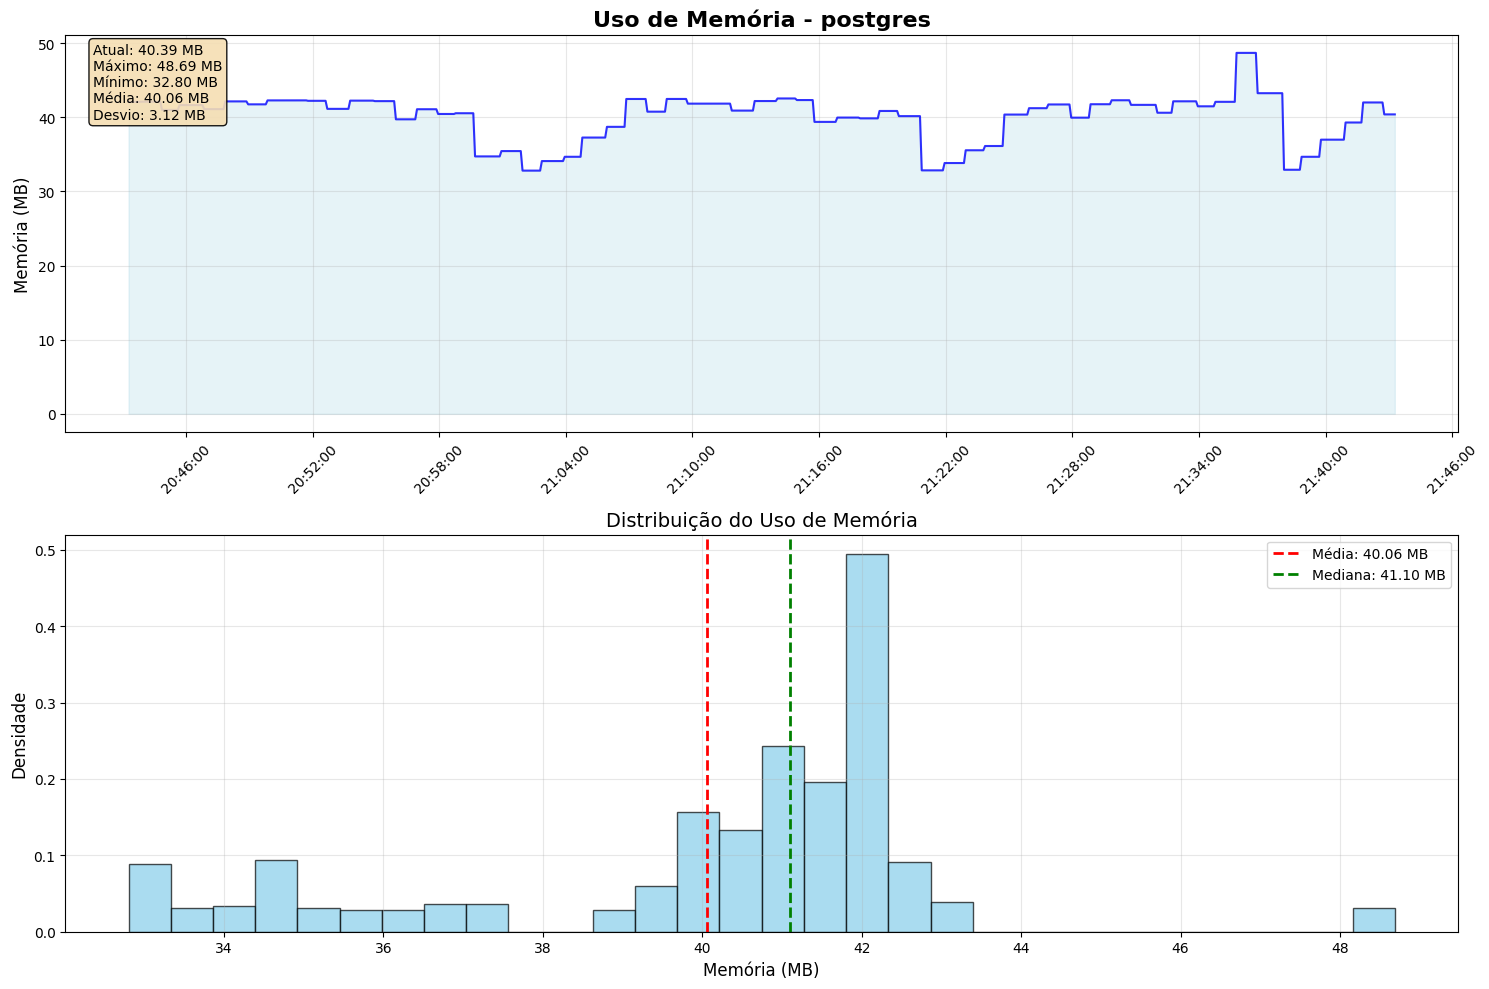


📈 ESTATÍSTICAS DETALHADAS:
----------------------------------------
Atual       :    40.39 MB
Máximo      :    48.69 MB
Mínimo      :    32.80 MB
Média       :    40.06 MB
Desvio      :     3.12 MB
Variação    :    39.65 %
Duração     : 0 days 01:00:00
Pontos      :      721


In [5]:
 monitor = quick_monitor("http://localhost:9090", "postgres", 60)

In [3]:
monitor.export_data("meus_dados.csv")

✅ Dados exportados para: meus_dados.csv
   Registros: 721


'meus_dados.csv'